<a href="https://colab.research.google.com/github/gwillig/data_analyse_friends_allergy/blob/master/allergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allergy



To Do:
* Logistic regression <br>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 


In [ ]:
'#1.Step: Load the need libs'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1zO7IJQdqzMMF_eAo0xWo_jKa8HBP8InlgcAoscJFC1c/edit?usp=sharing')

In [ ]:
'#3.Step: Load the data from the speadsheet'
sheet = wb.worksheet('current')
data = sheet.get_all_values()
df = pd.DataFrame(data)



## Pre-processing of df



In [ ]:
'#3.1.Step: Transpose the dataframe (switch rows with columns)'
df_t = df.T
'#3.2.Step: Make the first row to header of the sheet'
headers = df_t.iloc[0]
df_new  = pd.DataFrame(df_t.values[1:], columns=headers)

'#3.1.Step: Repalce n.a.n with nan'
df_nan = df_new.replace("n.a.n",np.nan)
'#3.2.Step: Drop rows with nan'
df_non = df_nan.dropna()
'#3.3.SteP: Convert the Datum column to datetime obj'
df_non["Datum_obj"] = pd.to_datetime(df_non["Datum"], format='%d.%m.%Y', errors='ignore')

display(df_non)

,Datum,Eier,"Eier, Zwiebeln und Brot",,,Gerichte Knorr Maggi,Tomatensuppe,Nudeln mit Tomatensoße,Nudelsuppe,"Suppe Griesklöschen, Nudeln, Süßkartoffel",,Gerichte Hofmann,Lachs mit Gemüse und Schupfnudeln,Zwiebelschnitzel und Kroketten,"Pfannkuchen, Hackfleisch, Blumenkohl",Rote Linsensuppe,Spinat und gefüllte Kartoffeltashen,Spinat und Kartoffelauflauf,Reis mit Erdnuss Tikka,Linsen und Spätzle,Lasagne,Chili,Tortellini,"Nudeln, Schnitzel, Hirtenkäse","Püree, Hähnchen, Brokkoli",Obst | Früchtte,Birne,Erdbeeren,Heidelbeeren,Bananensaft,Mango,Granatapfel,Wassermelone,Pfirsiche,Kosmetik,nivea creme,Pickelcreme,Neuroderm,Shampoo Balea Tiefenreinigung,Shampoo balea mango,...,Möbel,Couch,,,Tee,Lavendeltee,Pfirsich Vanille Meßmer Tee,Entspannung Tee,Allergiesymptome,juckende Kopfhaut,juckende Haut nach Baden,juckende Haut,juckende Nase oder Schnupfen,juckende Augen,Starke Allergie,Allergietablette genommen,Ausschlag nach Joggen auf Brust und Rücken,Starke Allergie nach Schlafen,Halsschmerzen,Gustav berührt mich Ausschlag auf Haut,Leichte hibbel Gesicht,Starker Ausschlag Rücken,Dunkle Augenringe,Allergie Gräser,Ambrosia,Ampfer,Beifuß,Birke,Buche,Eiche,Erle,Esche,Gräser,Hasel,Pappel,Roggen,Ulme,Wegerich,Weide,Datum_obj
0,27.03.2020,,0,,,,0,,0,0,,,1,,,,,,0,0,0,0,,,,,0,0,0,0,0,0,,,,0,0,0,1,0,...,,0,,,,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,keine,keine,keine,schwach,keine,keine,keine,schwach,keine,keine,stark,keine,stark,keine,stark,2020-03-27
1,28.03.2020,,0,,,,0,,0,0,,,0,,,,,,0,0,0,0,,,,,0,0,0,0,0,0,,,,0,0,0,0,0,...,,0,,,,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,keine,keine,keine,schwach,keine,keine,keine,schwach,keine,keine,stark,keine,stark,keine,stark,2020-03-28
2,29.03.2020,,1,,,,0,,0,0,,,0,,,,,,0,0,0,0,,,,,0,0,0,0,0,0,,,,0,0,0,1,0,...,,0,,,,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,keine,keine,keine,keine,keine,keine,keine,schwach,keine,keine,schwach,keine,schwach,keine,schwach,2020-03-29
3,30.03.2020,,0,,,,1,,0,0,,,0,,,,,,0,0,0,0,,,,,0,0,0,0,0,0,,,,0,0,0,0,0,...,,0,,,,,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,keine,keine,keine,schwach,keine,keine,keine,schwach,keine,keine,stark,keine,stark,keine,stark,2020-03-30
4,31.03.2020,,0,,,,0,,1,0,,,0,,,,,,0,0,0,0,,,,,1,0,0,0,0,0,,,,0,0,0,0,0,...,,0,,,,,0,,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,,keine,keine,keine,keine,keine,keine,keine,schwach,keine,keine,mittel,keine,mittel,keine,mittel,2020-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,30.05.2020,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,1,,,,,,,,,,,,,,,,,2020-05-30
65,01.06.2020,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,1,,,,,,,,,,,,,,,,,2020-06-01
66,02.06.2020,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,1,0,1,,,,,,,,,,,,,,,,,2020-06-02
67,03.06.2020,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,

# Pre-processing: Allergiesynt.

In [ ]:
def get_unique_values_df(df):
  column_values = a.values.ravel()
  unique_values =  pd.unique(column_values)
  print(unique_values)

array([ 0.,  1., nan])

In [ ]:
## Clean the data
allergie_columns=['juckende Kopfhaut',
 'juckende Haut nach Baden',
 'juckende Haut',
 'juckende Nase oder Schnupfen ',
 'juckende Augen ',
 'Starke Allergie ',
 'Allergietablette genommen ',
 'Ausschlag nach Joggen auf Brust und Rücken ',
 'Starke Allergie nach Schlafen',
 'Halsschmerzen ',
 'Gustav berührt mich Ausschlag auf Haut ',
 'Leichte hibbel Gesicht ',
 'Starker Ausschlag Rücken ',
 'Dunkle Augenringe',
 'Allergie Gräser',]

df_non[allergie_columns] = df_non[allergie_columns].replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})

def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  print(unique_values)
df_nan = df_non.dropna()
df_nan.shape

TypeError: ignored

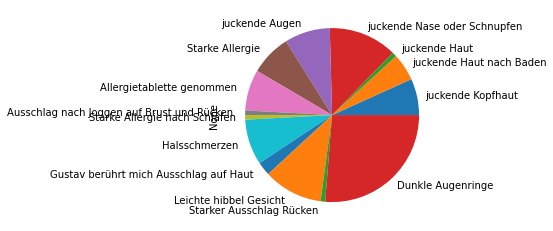

In [ ]:
# Comine all syntome
df_nan = df_non.dropna()
df_nan[allergie_columns].sum().plot.pie()

In [ ]:
### Make sum allergie
df_nan['allergie_total'] = df_nan[allergie_columns].sum(axis=1)

df_nan.loc[df_nan['allergie_total'] !=0.0, 'allergie_total_norm'] = 1
df_nan['allergie_total_norm'] = df_nan['allergie_total'].apply(lambda x: 1 if x >0.0 else 0)
df_nan["allergie_total_norm"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

0     0
1     0
2     0
3     0
4     1
     ..
64    1
65    1
66    1
67    1
68    1
Name: allergie_total_norm, Length: 68, dtype: int64

[0 1 'keine' 'schwach' 'stark' 'mittel' 2.0 3.0 '8' 4.0 5.0]


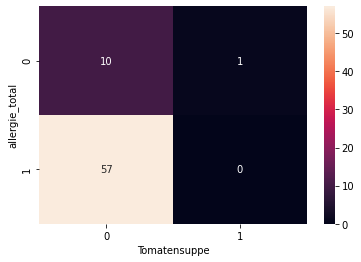

0.16176470588235264

In [ ]:
def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  print(unique_values)


df_con = df_nan.drop(columns=["Datum_obj", "Datum"])  

df_con_pre = df_con.replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})
get_unique_values_df(df_con_pre)




confusion_matrix = pd.crosstab(df_con_pre['allergie_total_norm'], df_con_pre['Tomatensuppe'], rownames=['allergie_total'], colnames=['Tomatensuppe'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
#### That is wrong! Now I need to find all rows where only "Tomatensuppe" was differnt
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(confusion_matrix.values)
pvalue

array([[10,  1],
       [57,  0]])

In [ ]:
df_nan[['allergie_total_norm']].describe()

,allergie_total_norm
count,68.000000
mean,0.838235
std,0.370973
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000
